In [1]:
# Dependencies
import pandas as pd
import numpy as np
import csv
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# File to Load (Remember to Change These)
file_to_load = "resources/16zp03az.csv"
zip_codes = "resources/zipcodes.csv"
pv = "resources/Current_Median_Property_Value_Zip.csv"
# store into Pandas data frame
df = pd.read_csv('resources/16zp03az.csv')

In [3]:
zip_df = pd.read_csv(zip_codes, names=["ZipCode","City"])

In [4]:
zip_df1 = zip_df.rename(columns={"ZipCode":"Zip Code"})

In [5]:
avg_income_df = pd.merge(zip_df1, df, on="Zip Code", how="left")
avg_income_df.sort_values(by=['Average Income'], ascending=False)

,Zip Code,City,Number of returns,Amount,Average Income
87,85253,Paradise Valley,"8,080","3,816,652",472357.92
95,85262,Scottsdale,"5,380","1,751,971",325645.17
89,85255,Scottsdale,"20,030","4,621,284",230718.12
98,85266,Scottsdale,"5,050","1,091,206",216080.40
93,85259,Scottsdale,"10,560","1,817,035",172067.71
12,85018,Phoenix,"17,200","2,507,921",145809.36
103,85284,Tempe,"9,620","1,367,529",142154.78
96,85263,Rio Verde,"1,010","143,177",141759.41
92,85258,Scottsdale,"12,570","1,730,005",137629.67
33,85045,Phoenix,"3,330","407,820",122468.47


In [6]:
pv_df = pd.read_csv(pv, encoding="ISO-8859-1")
pv_df = pv_df.loc[:,["RegionName", "Zhvi"]]
#pv_df = pv_df[pv_df['State'] == "AZ"]
pv_df1 = pv_df.rename(columns={"RegionName":"Zip Code"})

In [7]:
income_pv_df = pd.merge(avg_income_df, pv_df1, on="Zip Code", how="left")
#income_pv_df1 = income_pv_df.groupby("Zip Code")

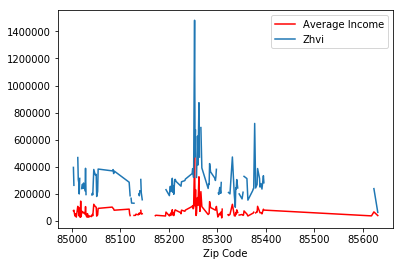

In [8]:
#ax = income_pv_df[['Zip Code', 'Average Income']].plot(x='Zip Code', kind='line', color = 'red')
#income_pv_df[['Zip Code', 'Zhvi']].plot(x='Zip Code', kind = 'line', ax=ax)
#plt.show()

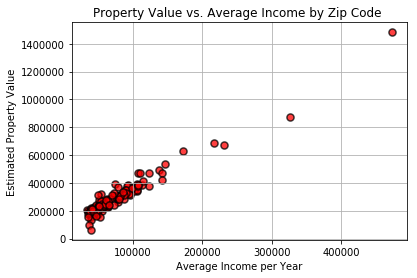

In [9]:
plt.scatter(income_pv_df["Average Income"], income_pv_df["Zhvi"], 
            marker="o", color="red", edgecolors="black", alpha = 0.75, s=50, 
            linewidth = 1.5)
# Incorporate the other graph properties
plt.title("Property Value vs. Average Income by Zip Code ")
plt.xlabel("Average Income per Year")
plt.ylabel("Estimated Property Value")
plt.grid()

# Save Figure
plt.savefig("plots/PV_AI.png")

# Show plot
plt.show()

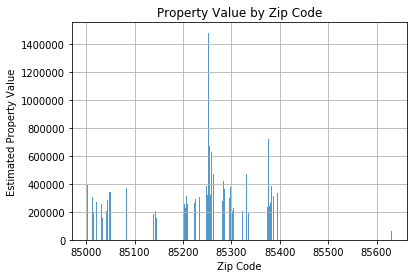

In [13]:
plt.bar(income_pv_df["Zip Code"], income_pv_df["Zhvi"], alpha = 0.75)
#plt.figure(income_pv_df["Zip Code"], income_pv_df["Average Income"], alpha = 0.75)
# Incorporate the other graph properties
plt.title("Property Value by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Estimated Property Value")
plt.grid()

# Save Figure
plt.savefig("plots/PV_zip.png")

# Show plot
plt.show()